1) Problem statement
    This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

# Data Collection

2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


import the csv data as pandas dataframe

In [4]:
student_data=pd.read_csv(r'C:\Users\SACHIN\Downloads\StudentsPerformance.csv')


In [5]:
# show top 5 
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
student_data.shape

(1000, 8)

In [13]:
# check data types 

student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
# check nulll values 
student_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
# check unique values 

student_data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [12]:
# check duplicate values 

student_data.duplicated().sum()

0

In [14]:
# Check statistics of data set

student_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
student_data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [28]:
student_data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [16]:
# exploring data 

print("categories in gender variable: ",end=" ")
print(student_data['gender'].unique())

print("categories in race varianle :  ",end=" ")
print(student_data['race/ethnicity'].unique())


print("categories in parental level of education varianle :  ",end=" ")
print(student_data['parental level of education'].unique())


print("categories in lunch varianle :  ",end=" ")
print(student_data['lunch'].unique())


print("categories in test preparation course varianle :  ",end=" ")
print(student_data['test preparation course'].unique())

categories in gender variable:  ['female' 'male']
categories in race varianle :   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education varianle :   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch varianle :   ['standard' 'free/reduced']
categories in test preparation course varianle :   ['none' 'completed']


In [18]:
# Adding columns for "Total Score" and "Average"

In [19]:
student_data['total score']=student_data['math score'] + student_data['reading score'] + student_data['writing score']

student_data['average']=student_data['total score']/3

In [20]:
student_data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [21]:
# number of students who got full marks in math , reading , writing 

In [27]:
math_full=student_data[student_data['math score']==100]['average'].count()
writing_full=student_data[student_data['writing score']==100]['average'].count()
reading_full=student_data[student_data['reading score']==100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


# Visualisation data

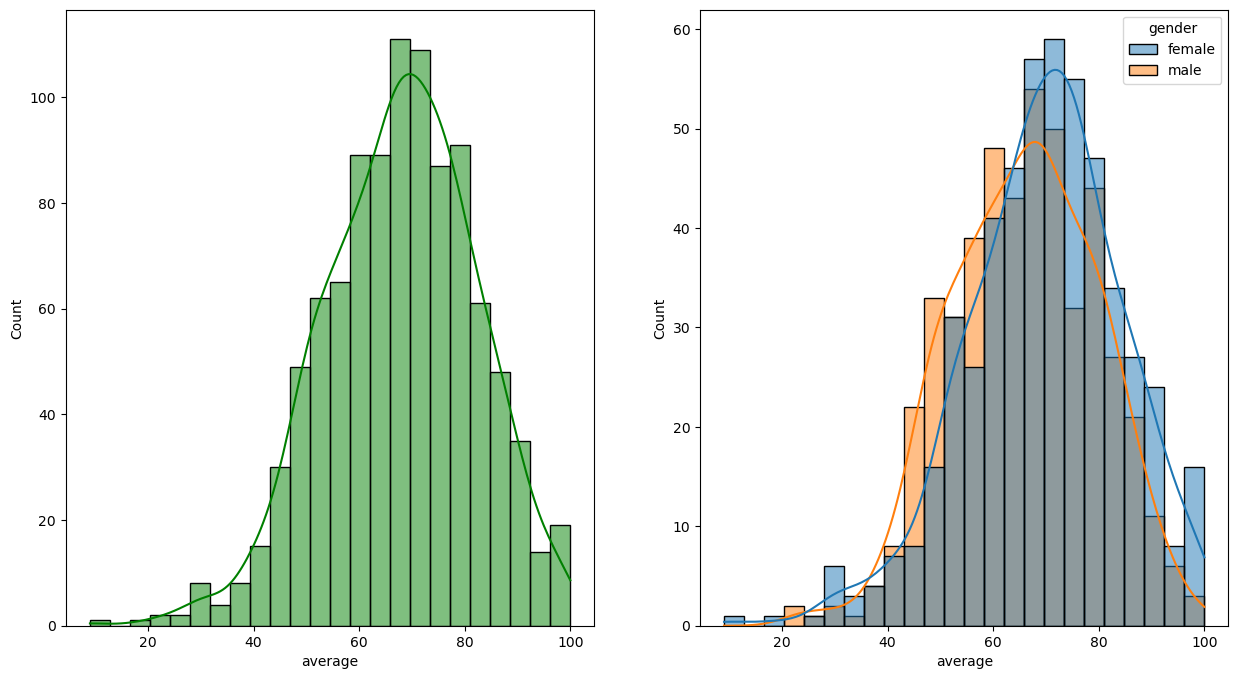

In [35]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.histplot(data=student_data,x='average',kde=True,color='g')

plt.subplot(122)
sns.histplot(data=student_data,x='average',kde=True, hue='gender')
plt.show()

In [36]:
student_data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score', 'average'],
      dtype='object')

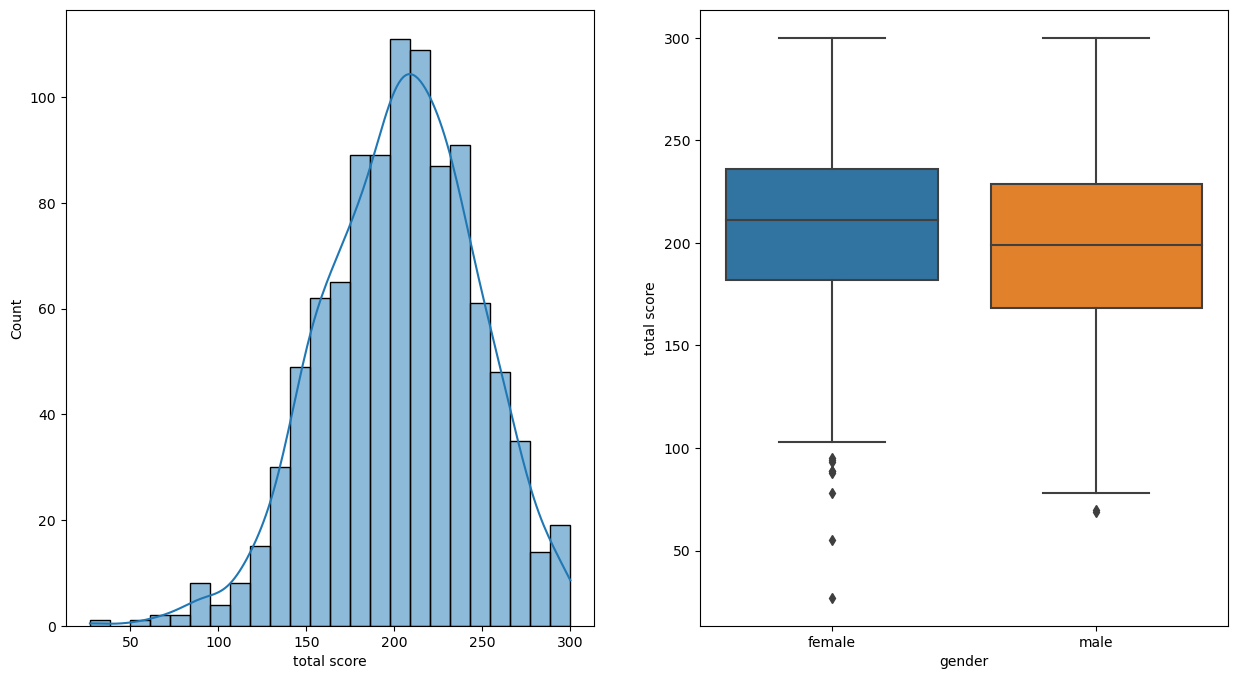

In [59]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.histplot(data=student_data,x='total score',kde=True)

plt.subplot(122)
sns.boxplot(data=student_data,x='gender',y='total score')
plt.show()

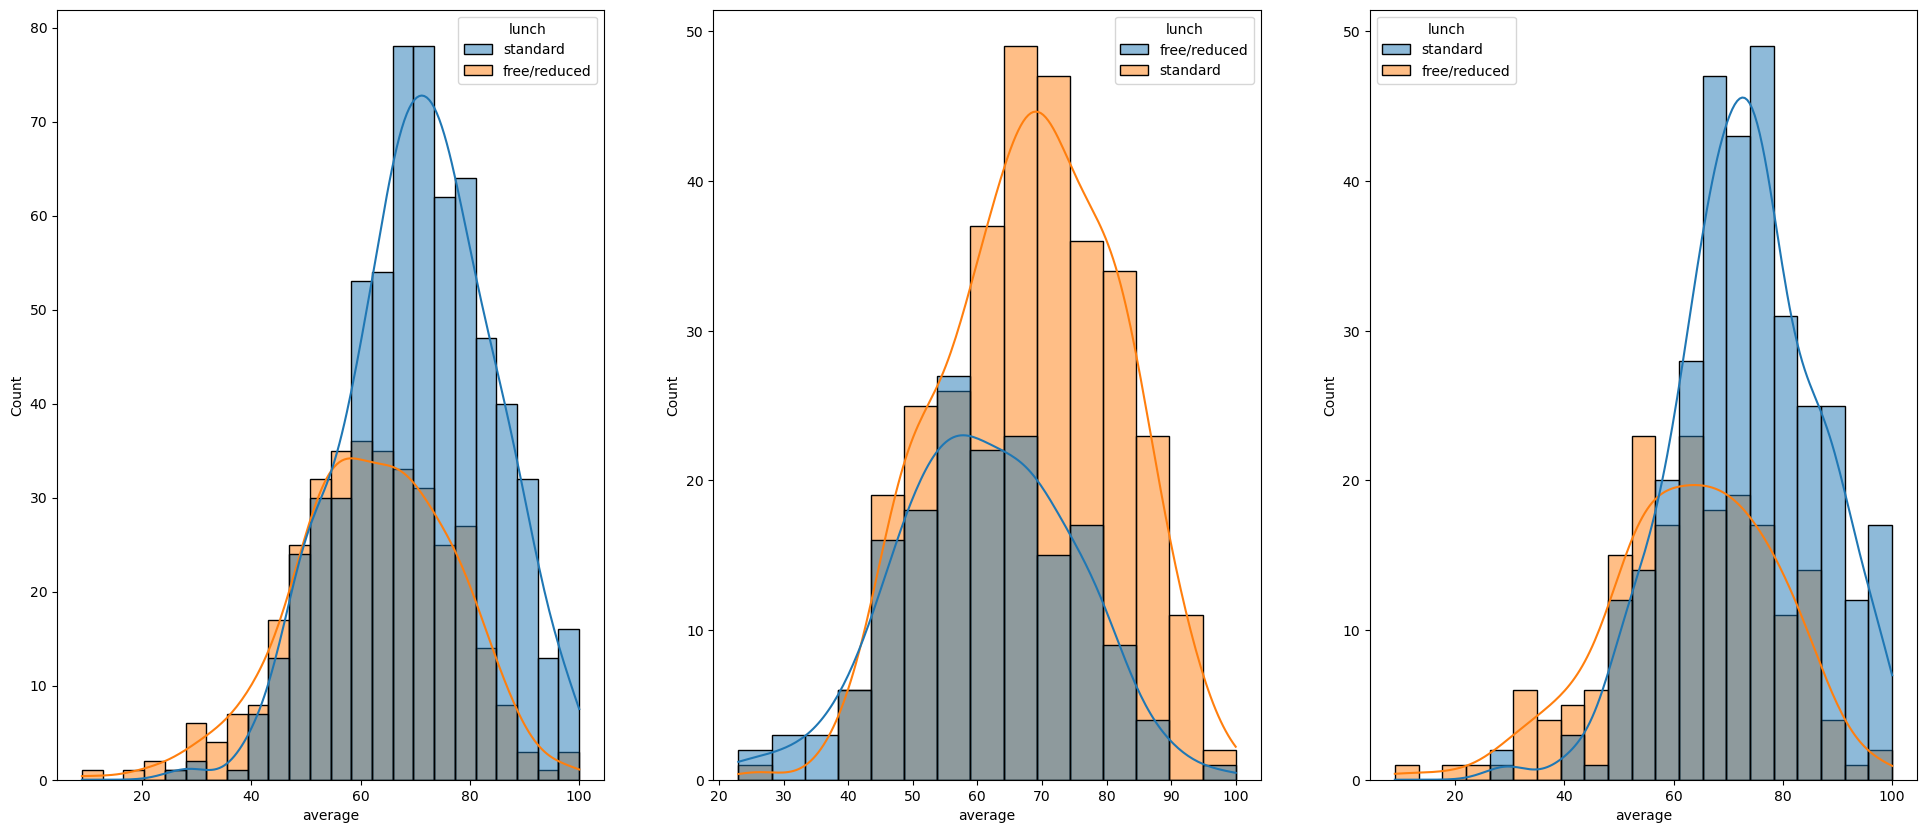

In [45]:
plt.figure(figsize=(24,10))
plt.subplot(131)
sns.histplot(data=student_data,x='average',kde=True,hue='lunch')

plt.subplot(132)
sns.histplot(data=student_data[student_data.gender=='male'],x='average',kde=True,hue='lunch')

plt.subplot(133)
sns.histplot(data=student_data[student_data.gender=='female'],x='average',kde=True,hue='lunch')

plt.show()


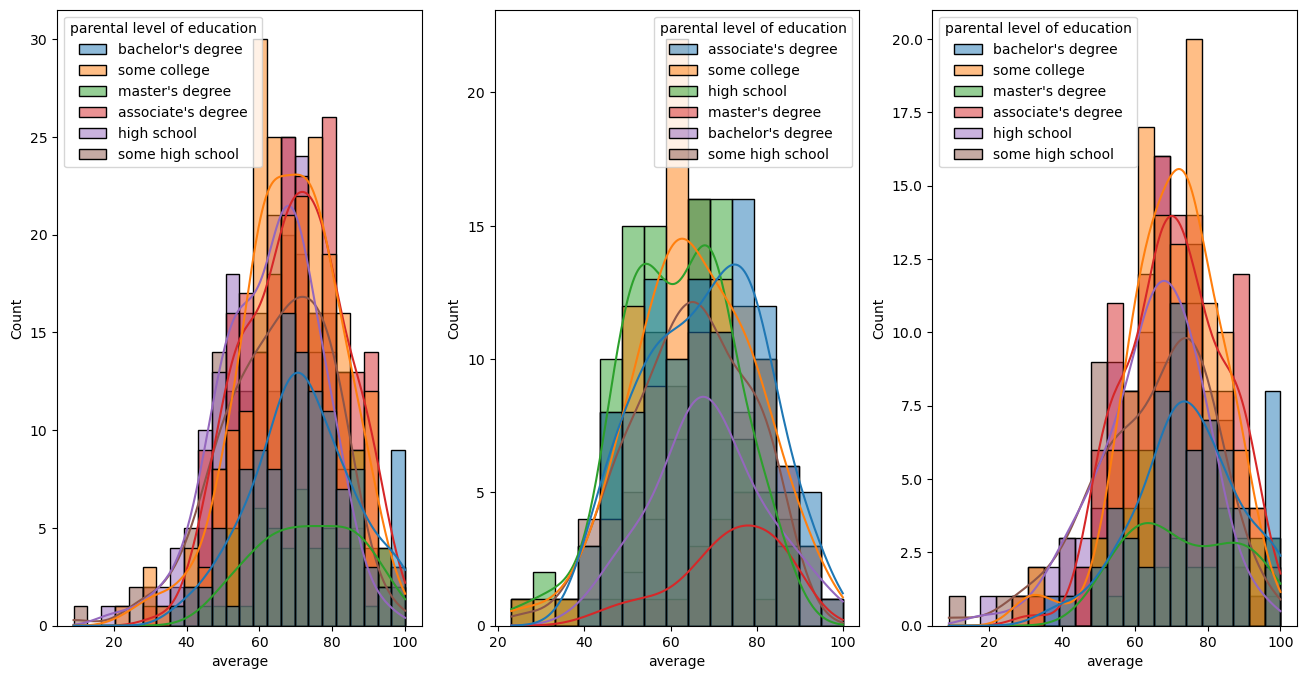

In [54]:
plt.figure(figsize=(16,8))
plt.subplot(131)
sns.histplot(data=student_data,x='average',kde=True,hue='parental level of education')

plt.subplot(132)
sns.histplot(data=student_data[student_data.gender=='male'],x='average',kde=True,hue='parental level of education')

plt.subplot(133)
sns.histplot(data=student_data[student_data.gender=='female'],x='average',kde=True,hue='parental level of education')

plt.show()

In [60]:
student_data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score', 'average'],
      dtype='object')

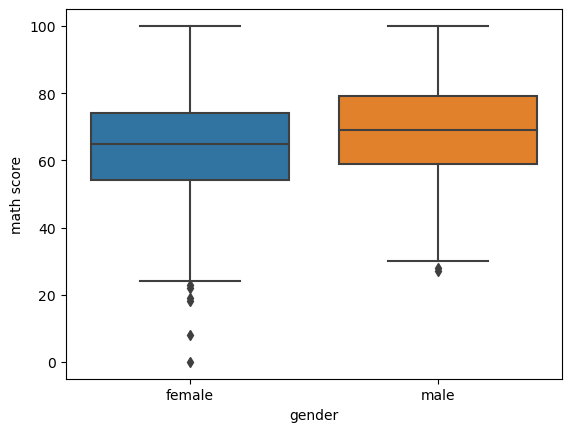

In [57]:
sns.boxplot(data=student_data,x='gender',y='math score')
plt.show()

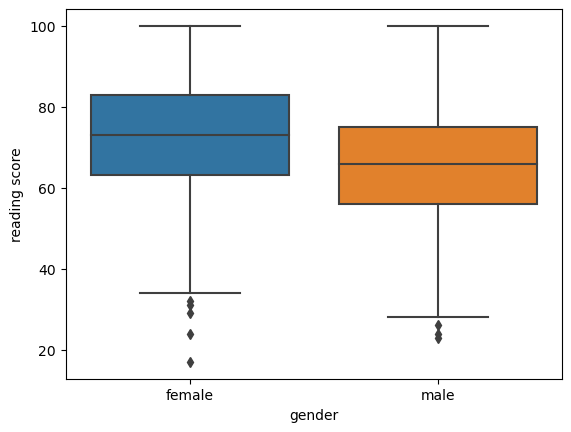

In [61]:
sns.boxplot(data=student_data,x='gender',y='reading score')
plt.show()

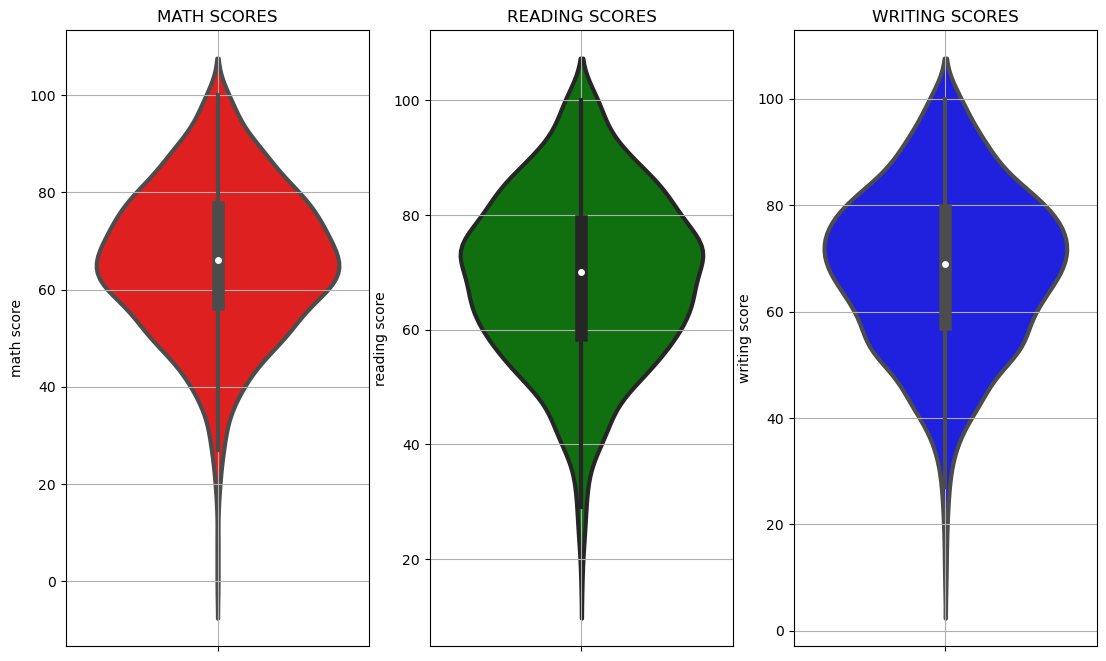

In [65]:
plt.figure(figsize=(18,8))

plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=student_data,color='red',linewidth=3)
plt.grid()

plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=student_data,color='green',linewidth=3)
plt.grid()

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=student_data,color='blue',linewidth=3)
plt.grid()
plt.show()

In [72]:
# 
student_data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

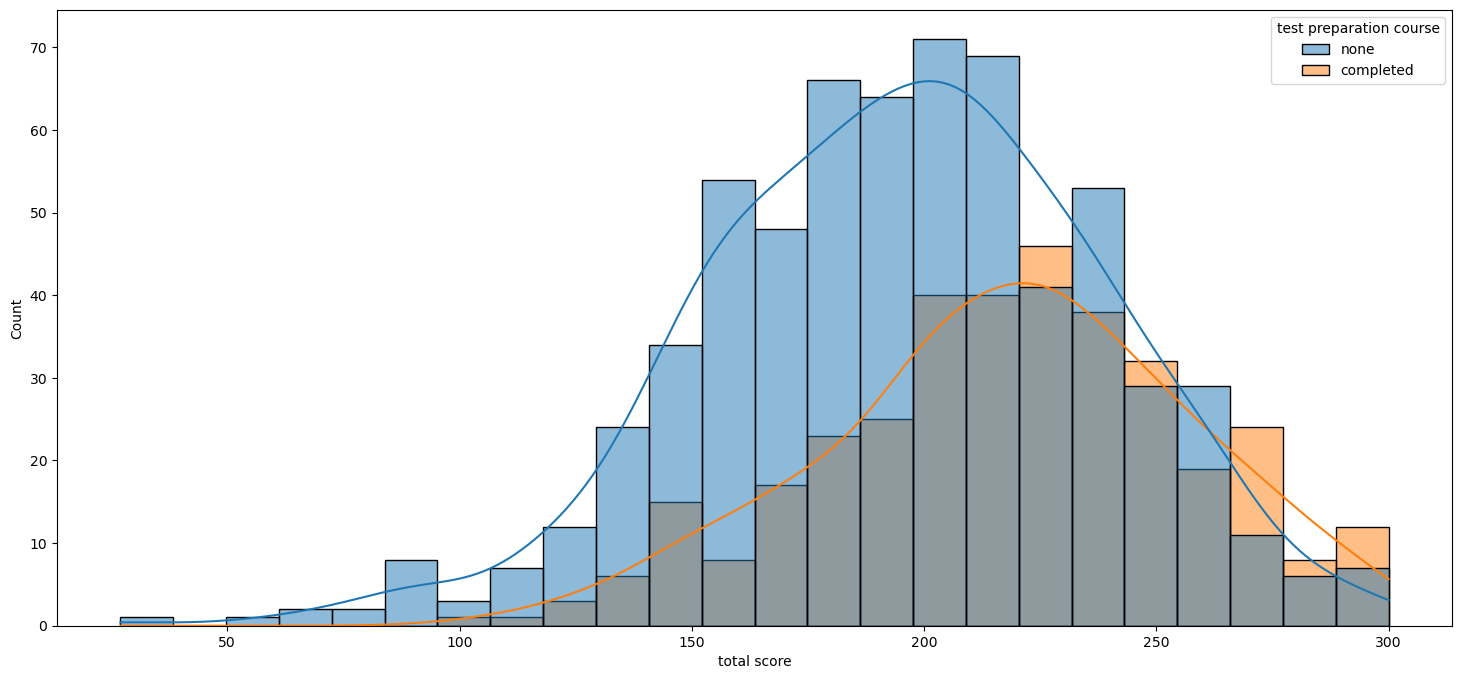

In [76]:
plt.figure(figsize=(18,8))
sns.histplot(data=student_data,x='total score',kde=True,hue='test preparation course')
plt.show()

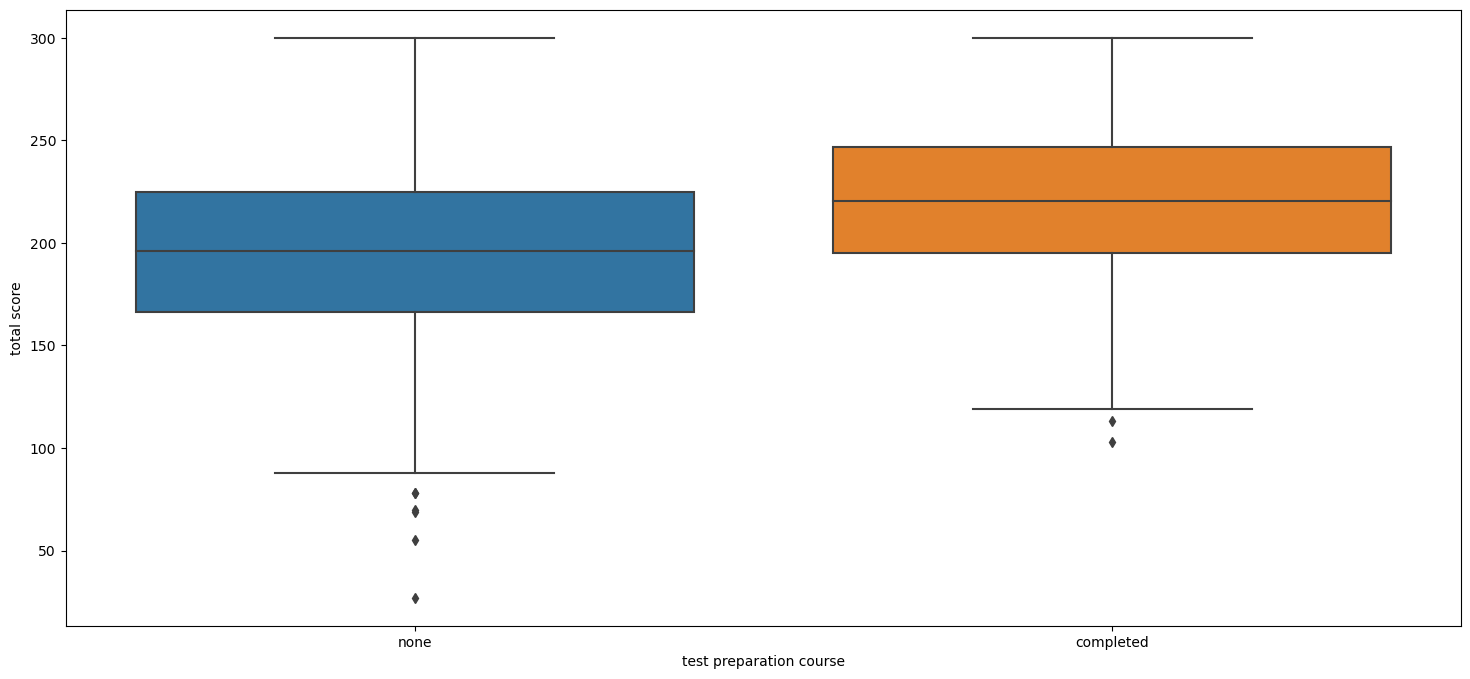

In [77]:
plt.figure(figsize=(18,8))
sns.boxplot(data=student_data,x='test preparation course',y='total score')
plt.show()

In [85]:
#  Multivariate analysis using pieplot

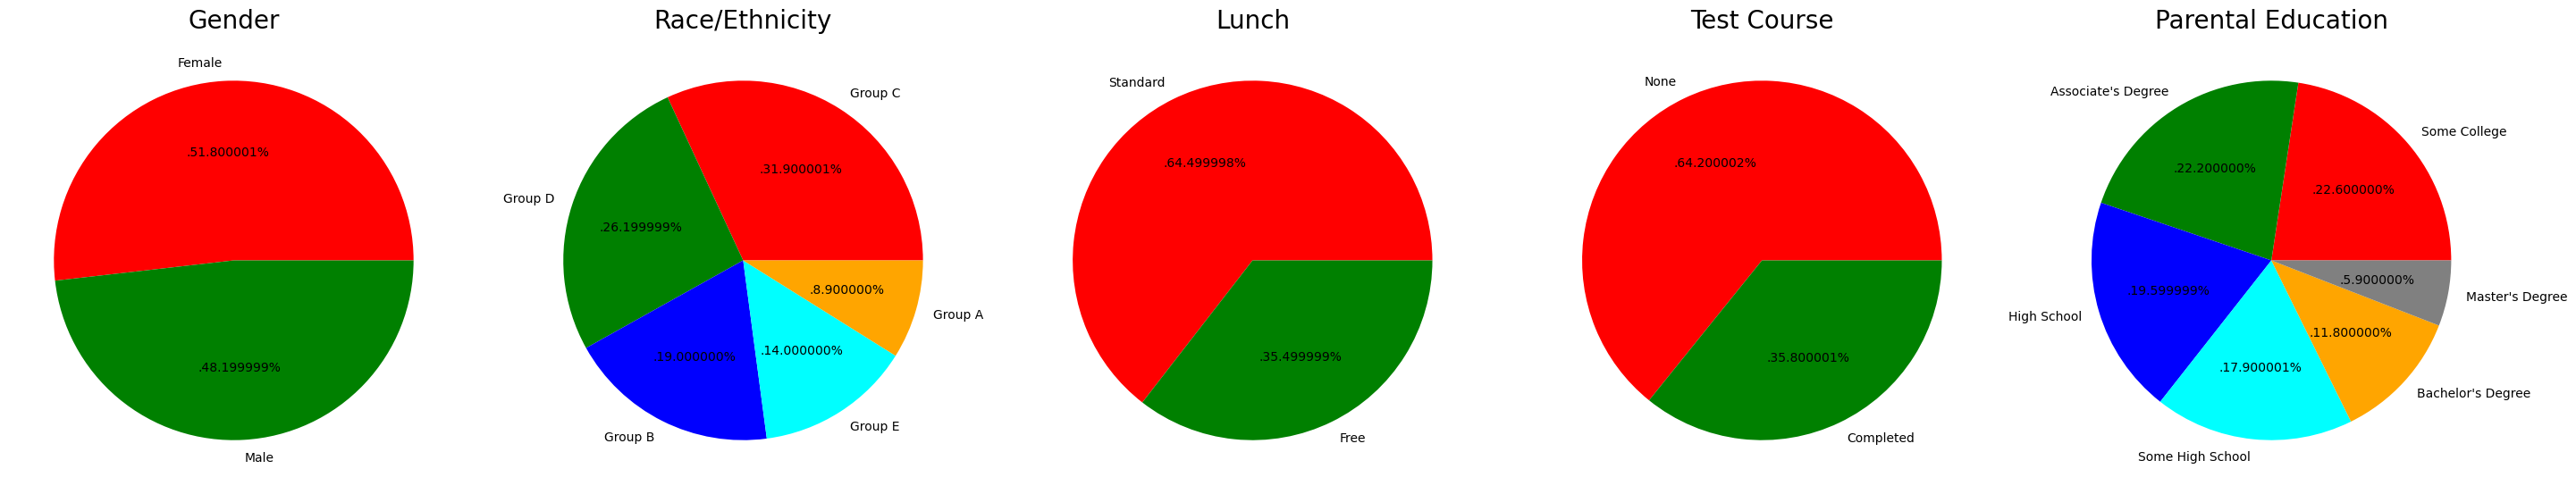

In [84]:
plt.rcParams['figure.figsize'] = (29, 15)

plt.subplot(1, 5, 1)
size = student_data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = student_data['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = student_data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = student_data['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = student_data['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

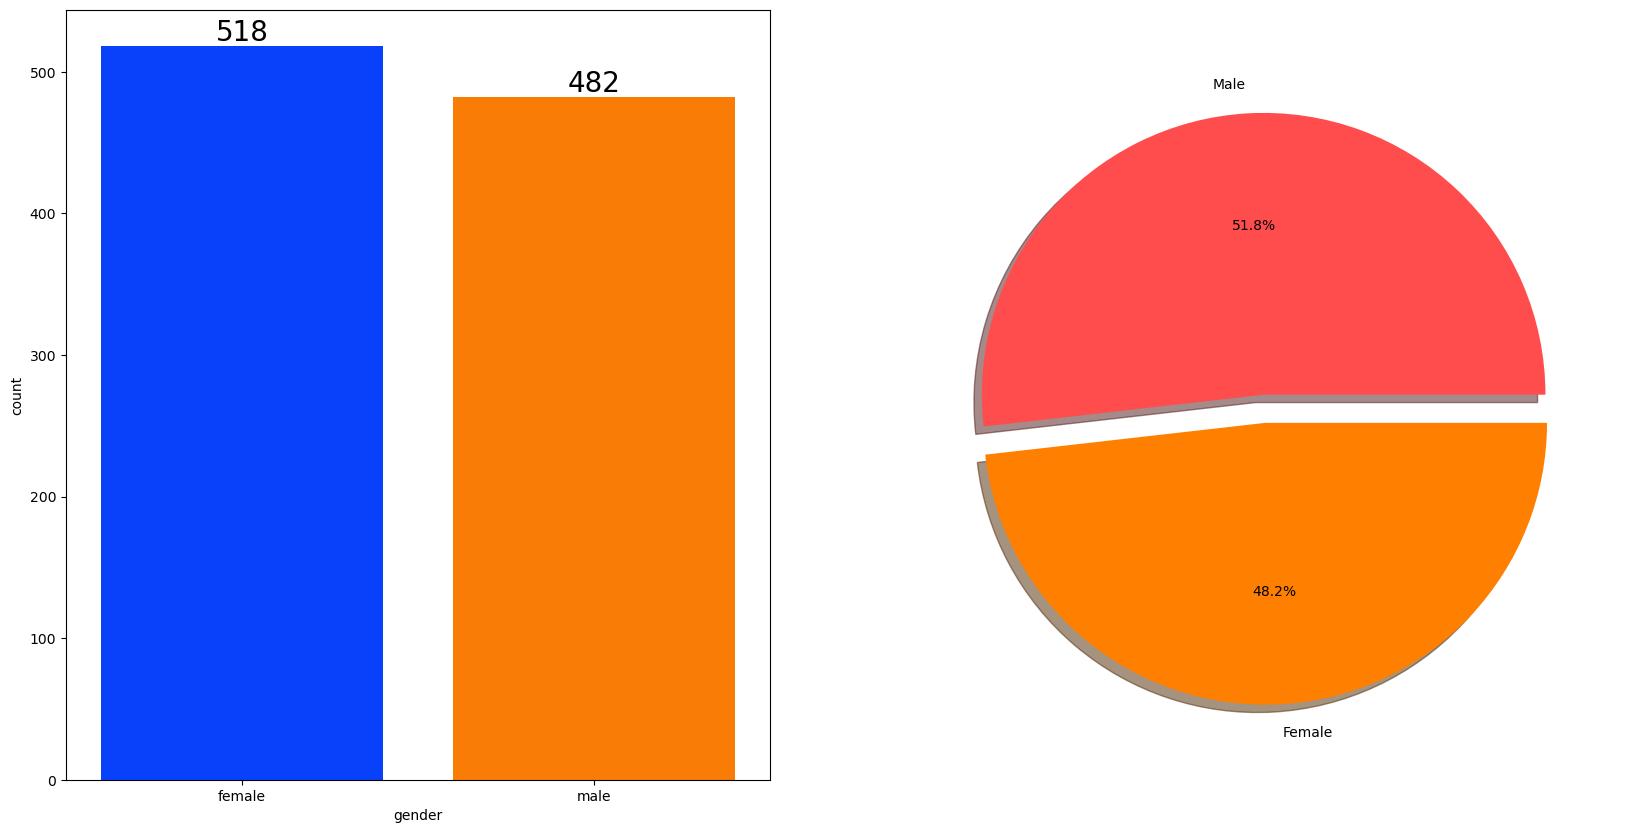

In [88]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=student_data['gender'],data=student_data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=student_data['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()